Frame 3 | Snake length: 2 | HUD: 18
Found via: slithers_search | Foods: 50


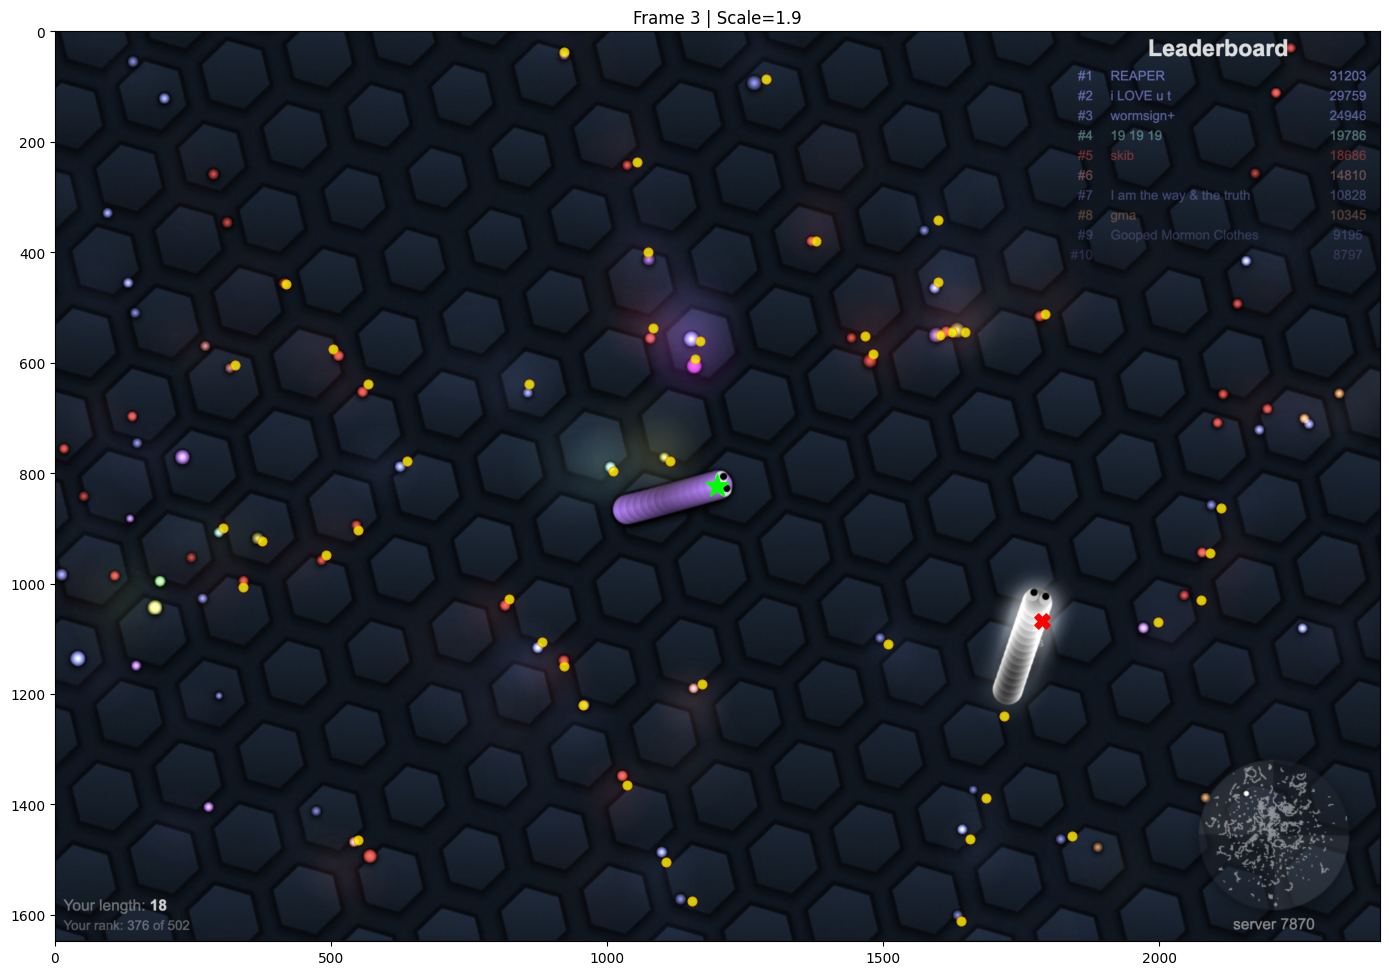

In [25]:
# Simple Slither.io Game State Visualizer
import json
from PIL import Image
import matplotlib.pyplot as plt
import os
# === CONFIGURE THESE ===
GAME_FOLDER = "games/" + os.listdir("games")[-1]
FRAME_IDX = 3  # Which frame to visualize
SCALE = 1.90

# Load data
game_log = json.load(open(f"{GAME_FOLDER}/game_log.json"))
frame = game_log["frames"][FRAME_IDX]
gw = frame["game_world"]
img = Image.open(f"{GAME_FOLDER}/{frame['image_file']}")
img_w, img_h = img.size
cx, cy = img_w // 2, img_h // 2

# Reference point (our snake position)
snake = gw["snake"]
sx, sy = snake["x"], snake["y"]

print(f"Frame {FRAME_IDX} | Snake length: {snake['length']} | HUD: {frame['state']['snake_length']}")
print(f"Found via: {snake.get('found_via', 'unknown')} | Foods: {len(gw.get('foods', []))}")

# Plot
fig, ax = plt.subplots(figsize=(14, 10))
ax.imshow(img)
ax.set_xlim(0, img_w)
ax.set_ylim(img_h, 0)

# Foods (yellow)
for f in gw.get("foods", []):
    x = cx + (f["x"] - sx) * SCALE
    y = cy + (f["y"] - sy) * SCALE
    if 0 <= x <= img_w and 0 <= y <= img_h:
        ax.scatter(x, y, c='yellow', s=40, alpha=0.8, edgecolors='orange', linewidths=1)

# Other snakes (red X)
for s in gw.get("other_snakes", []):
    x = cx + (s["x"] - sx) * SCALE
    y = cy + (s["y"] - sy) * SCALE
    if 0 <= x <= img_w and 0 <= y <= img_h:
        ax.scatter(x, y, c='red', s=120, marker='X')

# Our snake (green star at center)
ax.scatter(cx, cy, c='lime', s=300, marker='*', zorder=10)
ax.set_title(f"Frame {FRAME_IDX} | Scale={SCALE}")
plt.tight_layout()
plt.show()
